## Behavior ISC: AnnaK Method

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='grade3') 
from Function import get_tril_vec

# define data repository
data_dir = 'high_low'
results_dir = 'new_res'

# define the func.

In [2]:
def est_annak(n_subs, raw_data):
    high,low = raw_data['high'], raw_data['low']
    high_rank, low_rank = rankdata(high), rankdata(low) # explicity convert the raw scores to ranks
    simi_high, simi_low = np.zeros((n_subs, n_subs)), np.zeros((n_subs, n_subs))
    
    for i in range(n_subs):
        for j in range(n_subs):
            if i < j:
                sim_ij = np.mean([high_rank[i], high_rank[j]])/n_subs
                simi_high[i,j] = sim_ij
                simi_high[j,i] = sim_ij
            elif i==j:
                simi_high[i,j] = 1
    for i in range(n_subs):
        for j in range(n_subs):
            if i < j:
                sim_ij = np.mean([low_rank[i], low_rank[j]])/n_subs
                simi_low[i,j] = sim_ij
                simi_low[j,i] = sim_ij
            elif i==j:
                simi_low[i,j] = 1
    return simi_high, simi_low


In [3]:
def eeg_annak(n_subs, raw_data):
    high,low = raw_data['high'], raw_data['low']
    high_rank, low_rank = rankdata(high), rankdata(low) # explicity convert the raw scores to ranks
    simi_high, simi_low = np.zeros((n_subs, n_subs)), np.zeros((n_subs, n_subs))
    
    for i in range(n_subs):
        for j in range(n_subs):
            if i < j:
                sim_ij = np.mean([high_rank[i], high_rank[j]])/n_subs
                simi_high[i,j] = sim_ij
                simi_high[j,i] = sim_ij
            elif i==j:
                simi_high[i,j] = 1
    for i in range(n_subs):
        for j in range(n_subs):
            if i < j:
                sim_ij = np.mean([low_rank[i], low_rank[j]])/n_subs
                simi_low[i,j] = sim_ij
                simi_low[j,i] = sim_ij
            elif i==j:
                simi_low[i,j] = 1
    return simi_high, simi_low


### Section 2: Anxiety (IMQ-SO/SS, IRI-EC/PD)

Anxiety IMQ-SO/SS

# Anxiety-arousal

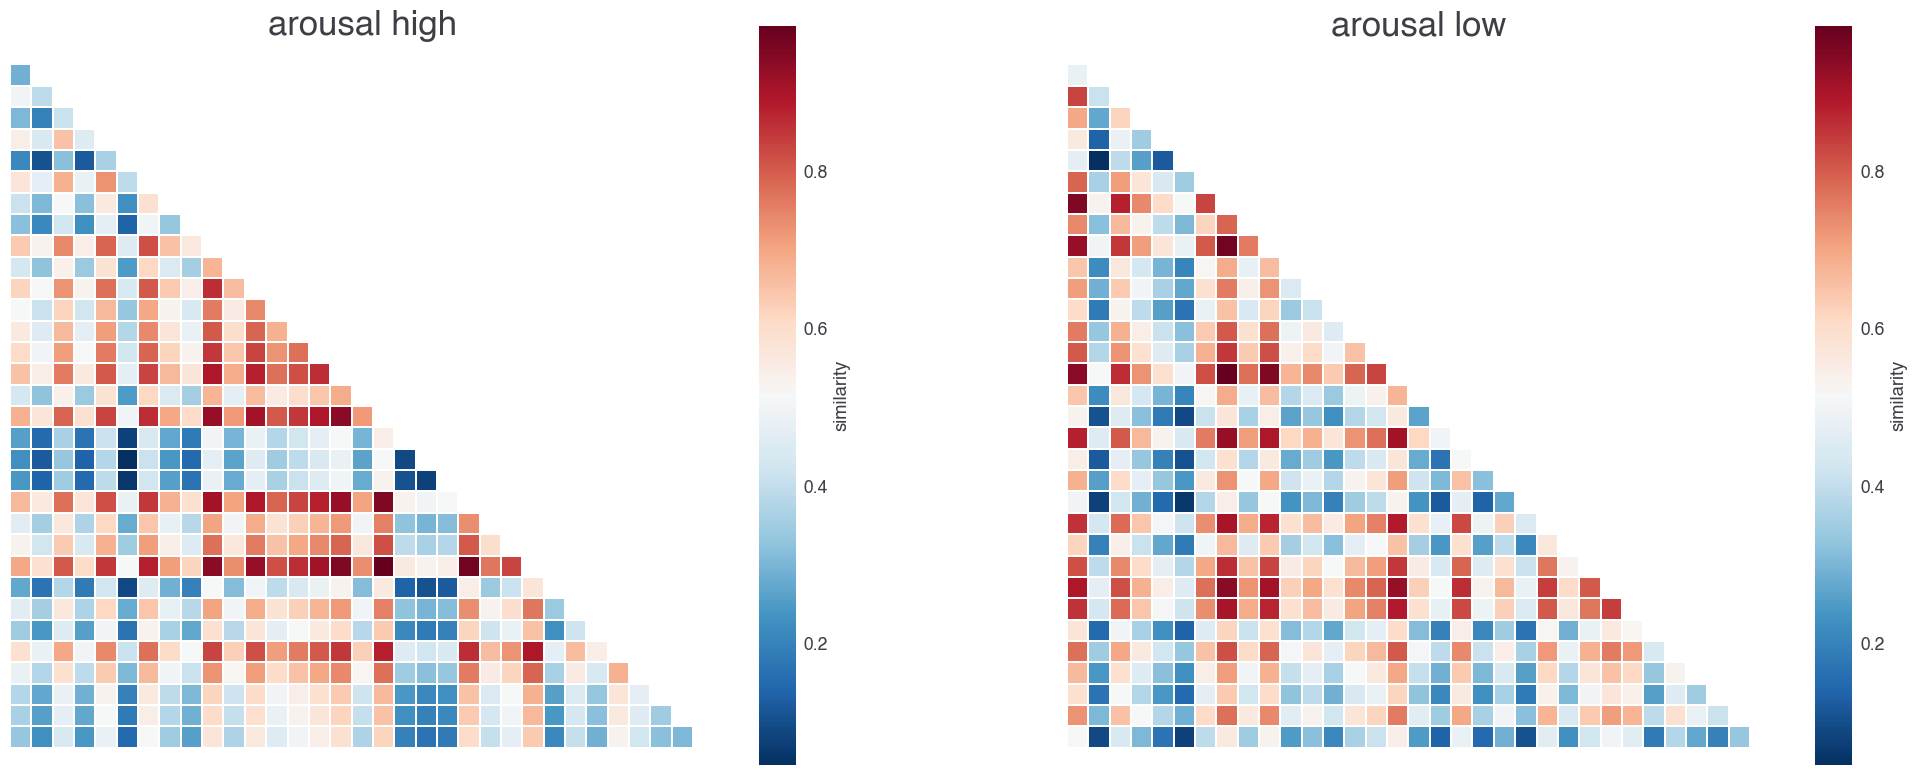

In [4]:
# Set the paprameters and import data
n_subs = 33
est_raw = pd.read_csv(os.path.join(data_dir, 'arousal_pe.csv'))
high_simi, low_simi = est_annak(n_subs, est_raw)
# Plot the isc matrix
mask =np.zeros_like(high_simi)
mask[np.triu_indices_from(mask)] = True
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,12))
sns.heatmap(high_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0.1, ax=ax1, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax1.set_title("arousal high", fontsize=25, fontweight='bold')
sns.heatmap(low_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0.1, ax=ax2, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax2.set_title("arousal low", fontsize=25, fontweight='bold')

# Save the result
ar_pe_high = get_tril_vec(high_simi)
ar_pe_low = get_tril_vec(low_simi)

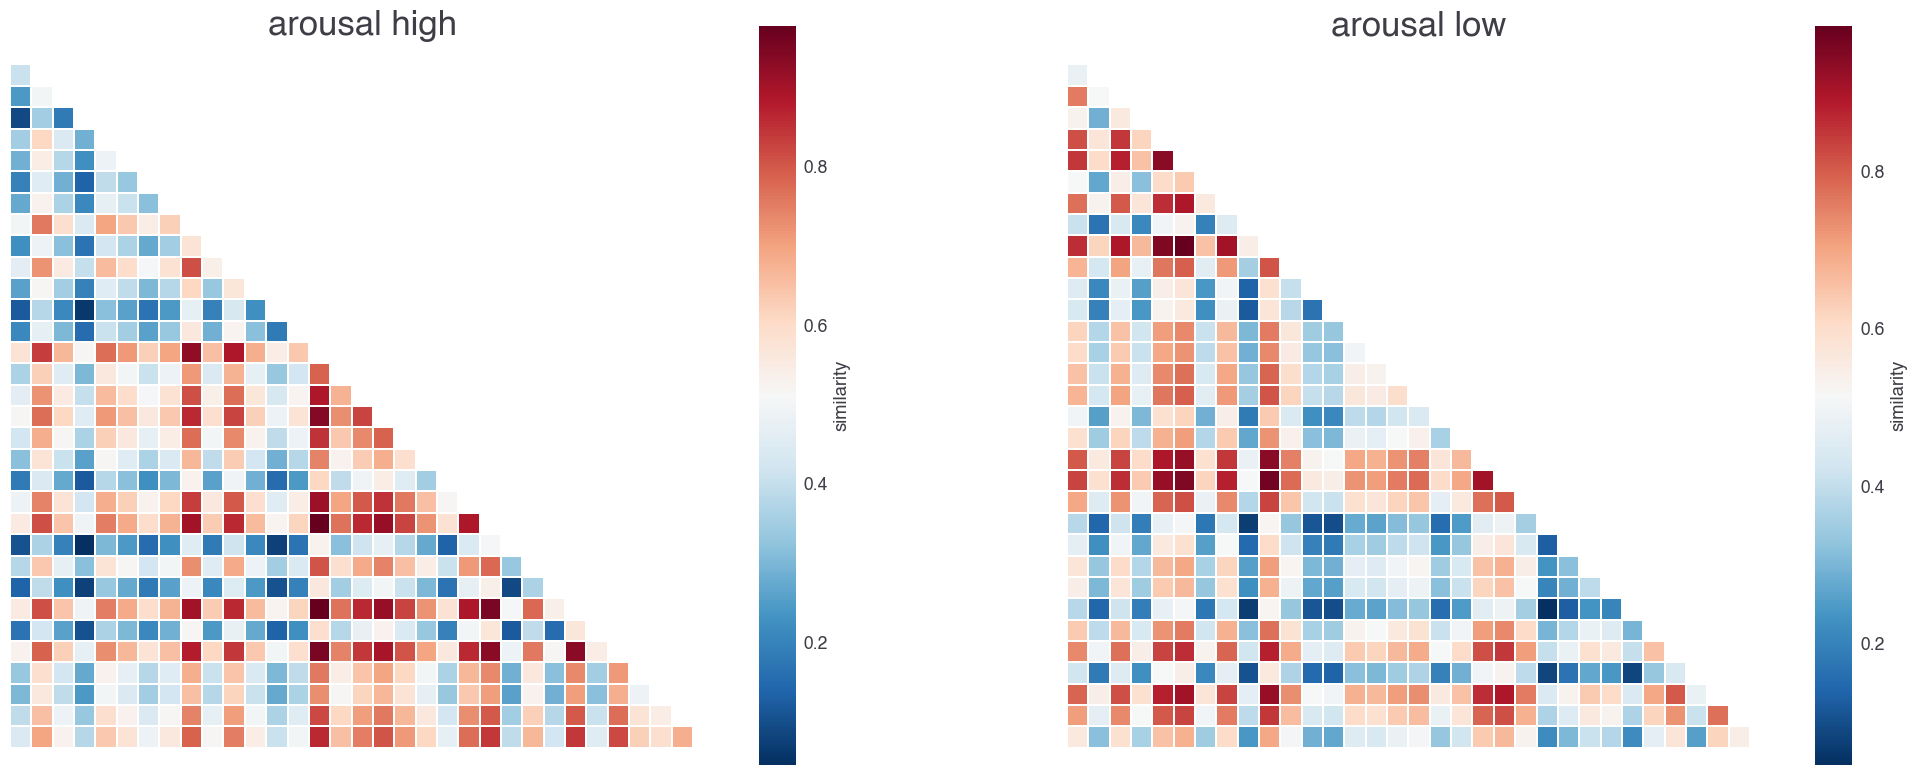

In [5]:
# Set the paprameters and import data
n_subs = 33
est_raw = pd.read_csv(os.path.join(data_dir, 'arousal_cue.csv'))
high_simi, low_simi = est_annak(n_subs, est_raw)
# Plot the isc matrix
mask =np.zeros_like(high_simi)
mask[np.triu_indices_from(mask)] = True
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,12))
sns.heatmap(high_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0.1, ax=ax1, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax1.set_title("arousal high", fontsize=25, fontweight='bold')
sns.heatmap(low_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0.1, ax=ax2, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax2.set_title("arousal low", fontsize=25, fontweight='bold')

# Save the result
ar_cue_high = get_tril_vec(high_simi)
ar_cue_low = get_tril_vec(low_simi)

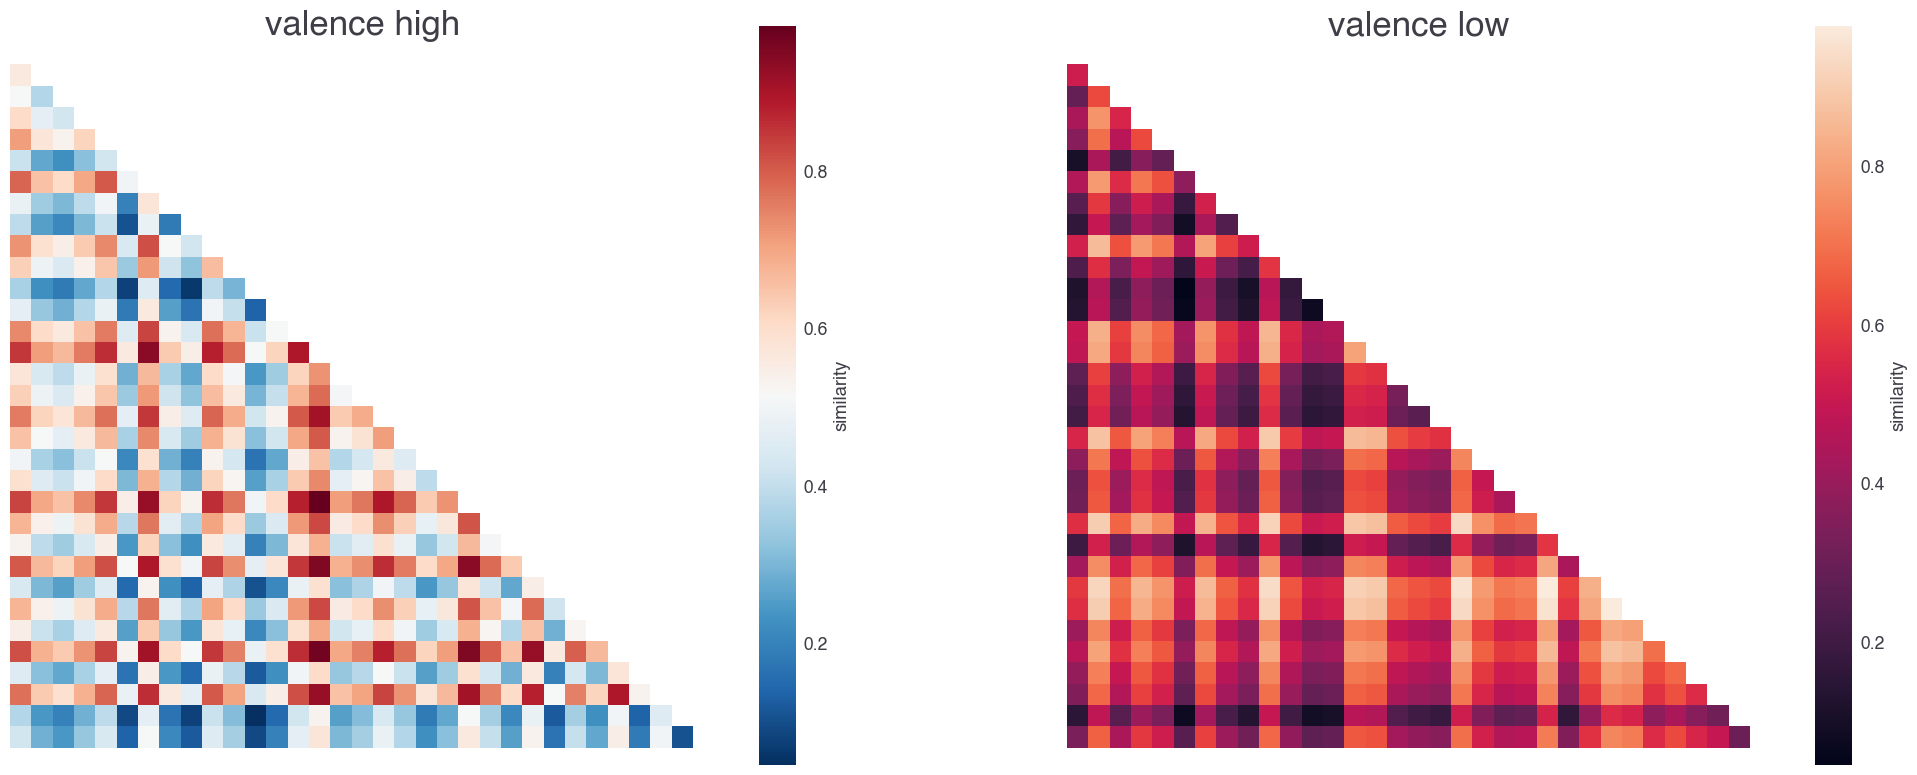

In [7]:
# Set the paprameters and import data
n_subs = 33
est_raw = pd.read_csv(os.path.join(data_dir, 'valence_pe.csv'))
high_simi, low_simi = est_annak(n_subs, est_raw)
# Plot the isc matrix
mask =np.zeros_like(high_simi)
mask[np.triu_indices_from(mask)] = True
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,12))
sns.heatmap(high_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0, ax=ax1, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax1.set_title("valence high", fontsize=25, fontweight='bold')
sns.heatmap(low_simi, square=True,  mask=mask, linewidths=0, ax=ax2, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax2.set_title("valence low", fontsize=25, fontweight='bold')

# Save the result
va_pe_high = get_tril_vec(high_simi)
va_pe_low = get_tril_vec(low_simi)

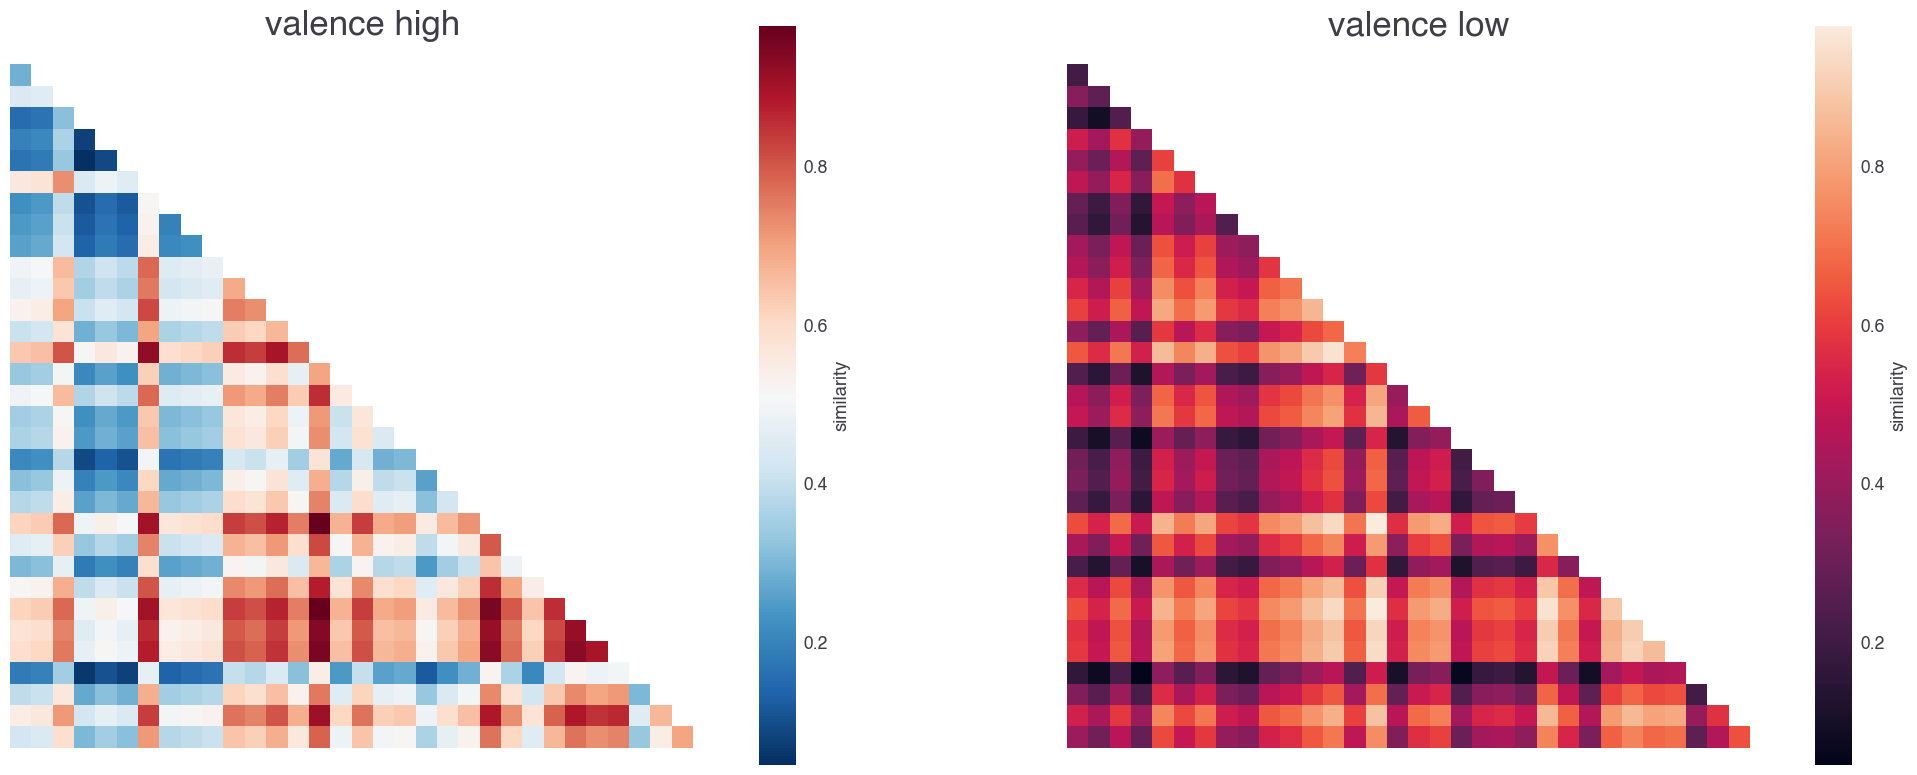

In [8]:
# Set the paprameters and import data
n_subs = 33
est_raw = pd.read_csv(os.path.join(data_dir, 'valence_cue.csv'))
high_simi, low_simi = est_annak(n_subs, est_raw)
# Plot the isc matrix
mask =np.zeros_like(high_simi)
mask[np.triu_indices_from(mask)] = True
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,12))
sns.heatmap(high_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0, ax=ax1, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax1.set_title("valence high", fontsize=25, fontweight='bold')
sns.heatmap(low_simi, square=True,  mask=mask, linewidths=0, ax=ax2, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax2.set_title("valence low", fontsize=25, fontweight='bold')

# Save the result
va_cue_high = get_tril_vec(high_simi)
va_cue_low = get_tril_vec(low_simi)

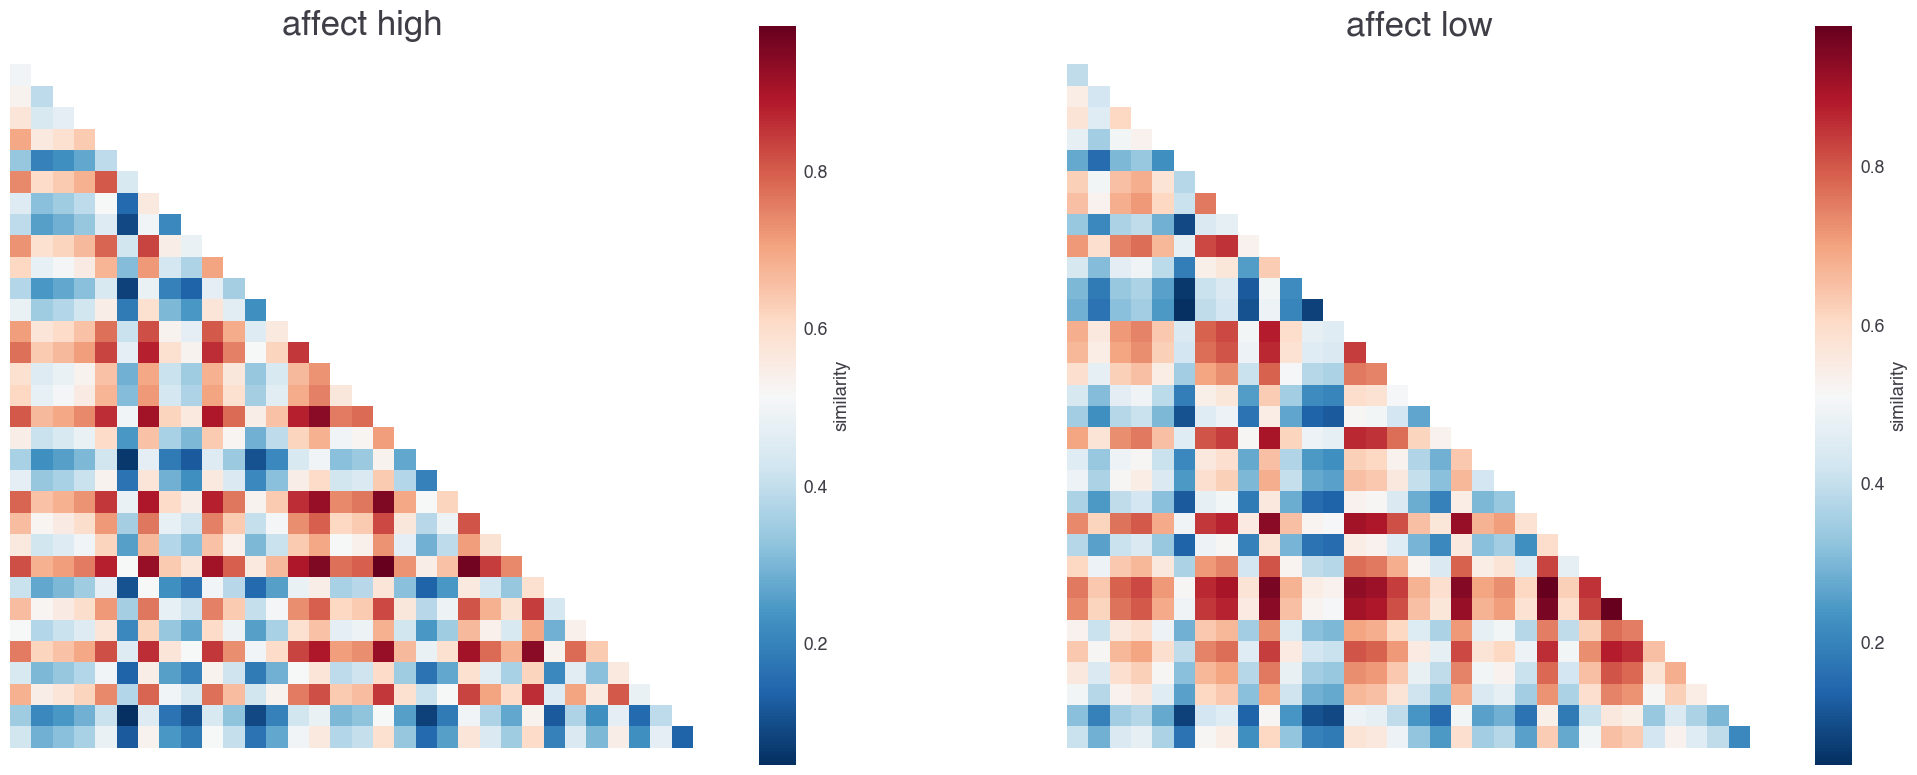

In [9]:
# Set the paprameters and import data
n_subs = 33
est_raw = pd.read_csv(os.path.join(data_dir, 'affect_pe.csv'))
high_simi, low_simi = est_annak(n_subs, est_raw)
# Plot the isc matrix
mask =np.zeros_like(high_simi)
mask[np.triu_indices_from(mask)] = True
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,12))
sns.heatmap(high_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0, ax=ax1, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax1.set_title("affect high", fontsize=25, fontweight='bold')
sns.heatmap(low_simi, square=True, cmap='RdBu_r', mask=mask, linewidths=0, ax=ax2, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax2.set_title("affect low", fontsize=25, fontweight='bold')

# Save the result
aff_pe_high = get_tril_vec(high_simi)
aff_pe_low = get_tril_vec(low_simi)

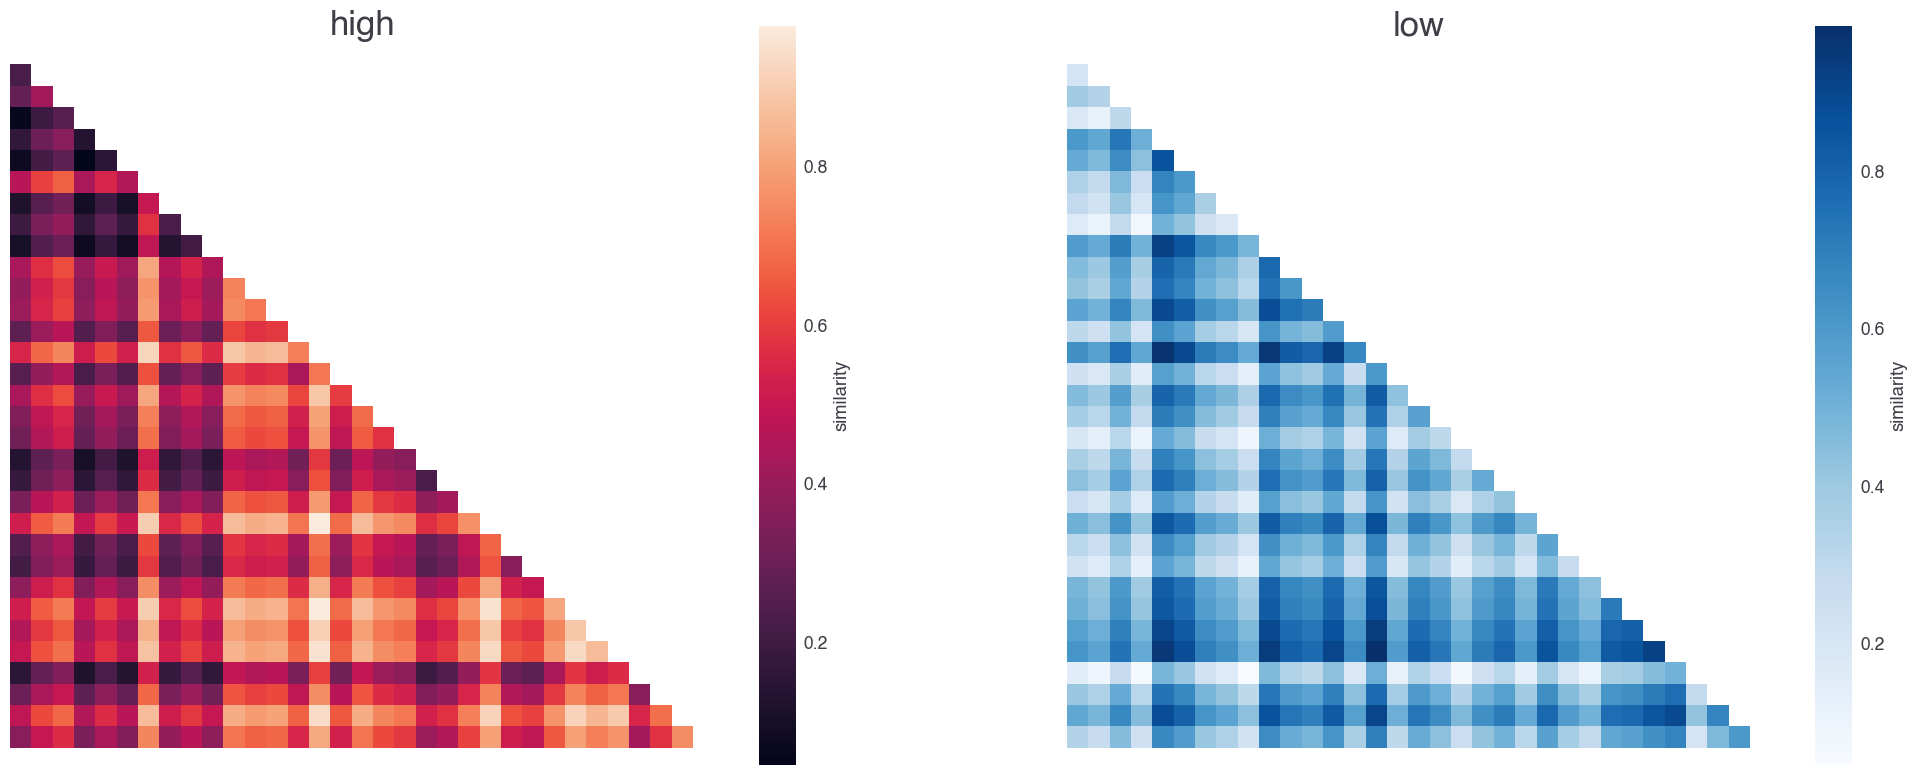

In [10]:
# Set the paprameters and import data
n_subs = 33
est_raw = pd.read_csv(os.path.join(data_dir, 'affect_cue.csv'))
high_simi, low_simi = eeg_annak(n_subs, est_raw)
# Plot the isc matrix
mask =np.zeros_like(high_simi)
mask[np.triu_indices_from(mask)] = True
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,12))
sns.heatmap(high_simi, square=True,  mask=mask, linewidths=0, ax=ax1, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax1.set_title("high", fontsize=25, fontweight='bold')
sns.heatmap(low_simi, square=True, cmap='Blues', mask=mask, linewidths=0, ax=ax2, xticklabels=False, yticklabels=False, cbar_kws={'label': 'similarity', "shrink": 0.8})
ax2.set_title("low", fontsize=25, fontweight='bold')

# Save the result
aff_cue_high = get_tril_vec(high_simi)
aff_cue_low = get_tril_vec(low_simi)

* Happy IRI-FS

In [11]:
behavisc= {'ar_pe_low':ar_pe_low, 'ar_pe_high':ar_pe_high, 'ar_cue_low':ar_cue_low, 'ar_cue_high':ar_cue_high,
           'va_pe_low':va_pe_low, 'va_pe_high':va_pe_high, 'va_cue_low':va_cue_low, 'va_cue_high':va_cue_high, 
           'aff_pe_low':aff_pe_low, 'aff_pe_high':aff_pe_high, 'aff_cue_low':aff_cue_low, 'aff_cue_high':aff_cue_high}
np.save(os.path.join(results_dir, 'behavisc_annak'), behavisc) 

In [12]:
b = np.c_[ar_pe_low, ar_pe_high, ar_cue_low, ar_cue_high, 
          va_pe_low, va_pe_high, va_cue_low, va_cue_high,
          aff_pe_low, aff_pe_high, aff_cue_low, aff_cue_high]
print(b)
np.savetxt("new_high_low_est_isc.csv", b, delimiter=",")

[[0.48484848 0.28787879 0.48484848 ... 0.5        0.21212121 0.22727273]
 [0.83333333 0.5        0.75757576 ... 0.53030303 0.39393939 0.28787879]
 [0.6969697  0.3030303  0.53030303 ... 0.57575758 0.18181818 0.06060606]
 ...
 [0.40909091 0.34848485 0.77272727 ... 0.39393939 0.68181818 0.6969697 ]
 [0.1969697  0.31818182 0.62121212 ... 0.46969697 0.46969697 0.57575758]
 [0.33333333 0.3030303  0.54545455 ... 0.13636364 0.60606061 0.75757576]]
